In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


In [2]:
data = pd.read_csv(r"c:\Users\pramo\Downloads\Churn_Modelling.csv")
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,42,2,0.00,1,1,1,101348.88,1
1,608,41,1,83807.86,1,0,1,112542.58,0
2,502,42,8,159660.80,3,1,0,113931.57,1
3,699,39,1,0.00,2,0,0,93826.63,0
4,850,43,2,125510.82,1,1,1,79084.10,0


In [3]:
data.isnull().sum()

CreditScore        0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [4]:
input_data = data.iloc[:,:-1]
output_data = data.iloc[:,-1]

In [5]:
ss = StandardScaler()
input_data = pd.DataFrame(ss.fit_transform(input_data),columns=input_data.columns)

In [6]:
input_data

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,-0.326221,0.293517,-1.041760,-1.225848,-0.911583,0.646092,0.970243,0.021886
1,-0.440036,0.198164,-1.387538,0.117350,-0.911583,-1.547768,0.970243,0.216534
2,-1.536794,0.293517,1.032908,1.333053,2.527057,0.646092,-1.030670,0.240687
3,0.501521,0.007457,-1.387538,-1.225848,0.807737,-1.547768,-1.030670,-0.108918
4,2.063884,0.388871,-1.041760,0.785728,-0.911583,0.646092,0.970243,-0.365276
...,...,...,...,...,...,...,...,...
9995,1.246488,0.007457,-0.004426,-1.225848,0.807737,0.646092,-1.030670,-0.066419
9996,-1.391939,-0.373958,1.724464,-0.306379,-0.911583,0.646092,0.970243,0.027988
9997,0.604988,-0.278604,0.687130,-1.225848,-0.911583,-1.547768,0.970243,-1.008643
9998,1.256835,0.293517,-0.695982,-0.022608,0.807737,0.646092,-1.030670,-0.125231


In [7]:
input_data.shape

(10000, 8)

In [8]:
x_train,x_test,y_train,y_test = train_test_split(input_data,output_data,test_size=0.2,random_state=42)

In [9]:
x_test.shape

(2000, 8)

In [10]:
import tensorflow

C:\Users\pramo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/attr_value.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
C:\Users\pramo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/tensor.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
C:\Users\pramo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Pyt

In [11]:
from keras.layers import Dense
from keras.models import Sequential

In [12]:
ann = Sequential()

In [13]:
ann.add(Dense(6,input_dim=8,activation="relu"))
ann.add(Dense(4,activation="relu"))
ann.add(Dense(2,activation="relu"))
ann.add(Dense(1,activation="sigmoid"))

C:\Users\pramo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
ann.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [15]:
ann.fit(x_train,y_train,batch_size=100,epochs=50)

Epoch 1/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - accuracy: 0.7774 - loss: 0.6025
Epoch 2/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.7945 - loss: 0.5238
Epoch 3/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.7945 - loss: 0.4929
Epoch 4/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.7945 - loss: 0.4775
Epoch 5/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.7945 - loss: 0.4667
Epoch 6/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.7945 - loss: 0.4582
Epoch 7/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.7945 - loss: 0.4507
Epoch 8/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7946 - loss: 0.4440
Epoch 9/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8049 - loss: 0.4384
Epoch 10/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.8085 - loss: 0.4330
Epoch 11/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8134 - loss: 0.4285
Epoch 12/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy:

OverFitting Improve

In [ ]:
ann.history.history

In [17]:
from keras.callbacks import EarlyStopping

In [18]:
ann.fit(x_train,y_train,batch_size=100,epochs=50,validation_data=(x_test,y_test),callbacks=EarlyStopping())

Epoch 1/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.8560 - loss: 0.3625 - val_accuracy: 0.8575 - val_loss: 0.3598
Epoch 2/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.8553 - loss: 0.3620 - val_accuracy: 0.8550 - val_loss: 0.3593
Epoch 3/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.8551 - loss: 0.3623 - val_accuracy: 0.8565 - val_loss: 0.3586
Epoch 4/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.8560 - loss: 0.3614 - val_accuracy: 0.8550 - val_loss: 0.3587


In [19]:
train_accuracy = ann.history.history["accuracy"]
test_accuracy = ann.history.history["val_accuracy"]

In [20]:
len(test_accuracy)

4

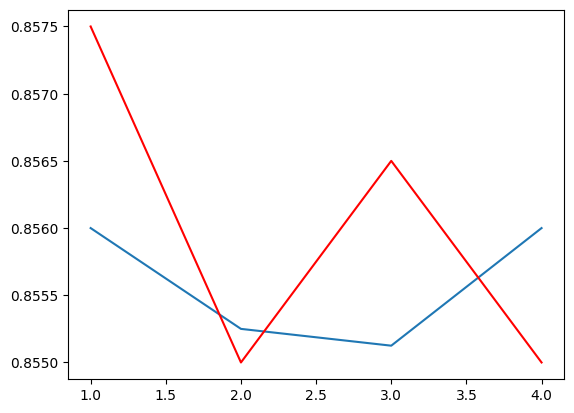

In [22]:
plt.plot([i for i in range(1,5)],train_accuracy)
plt.plot([i for i in range(1,5)],test_accuracy,c="red")
plt.show()

Regularization Overfitting Improve


In [23]:
from keras.regularizers import L2

In [24]:
ann.add(Dense(6,input_dim=8,activation="relu",kernel_regularizer=L2(l2=0.02)))
ann.add(Dense(4,activation="relu"))
ann.add(Dense(2,activation="relu"))
ann.add(Dense(1,activation="sigmoid"))

C:\Users\pramo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [25]:
ann.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [26]:
ann.fit(x_train,y_train,batch_size=100,epochs=50)

Epoch 1/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.7885 - loss: 0.7019
Epoch 2/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7945 - loss: 0.6749
Epoch 3/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7945 - loss: 0.6507
Epoch 4/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7945 - loss: 0.6274
Epoch 5/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8391 - loss: 0.6026
Epoch 6/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8544 - loss: 0.5764
Epoch 7/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8549 - loss: 0.5535
Epoch 8/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8554 - loss: 0.5341
Epoch 9/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8555 - loss: 0.5184
Epoch 10/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8566 - loss: 0.5042
Epoch 11/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8555 - loss: 0.4919
Epoch 12/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8564 - lo

In [27]:
ann.fit(x_train,y_train,batch_size=100,epochs=50,validation_data=(x_test,y_test),callbacks=EarlyStopping())

Epoch 1/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8558 - loss: 0.3671 - val_accuracy: 0.8485 - val_loss: 0.3749
Epoch 2/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8562 - loss: 0.3670 - val_accuracy: 0.8530 - val_loss: 0.3705
Epoch 3/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8561 - loss: 0.3656 - val_accuracy: 0.8540 - val_loss: 0.3697
Epoch 4/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8558 - loss: 0.3656 - val_accuracy: 0.8515 - val_loss: 0.3694
Epoch 5/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8547 - loss: 0.3655 - val_accuracy: 0.8535 - val_loss: 0.3680
Epoch 6/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8564 - loss: 0.3642 - val_accuracy: 0.8535 - val_loss: 0.3676
Epoch 7/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8568 - loss: 0.3640 - val_accuracy: 0.8500 - val_loss: 0.3713


In [28]:
train_accuracy = ann.history.history["accuracy"]
test_accuracy = ann.history.history["val_accuracy"]

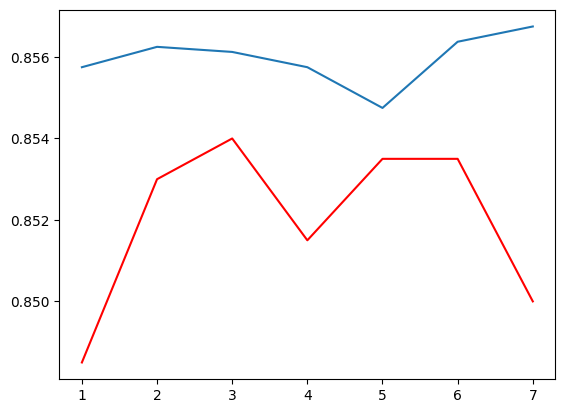

In [29]:
plt.plot([i for i in range(1,8)],train_accuracy)
plt.plot([i for i in range(1,8)],test_accuracy,c="red")
plt.show()

Batch Normalization 

In [39]:
from keras.layers import BatchNormalization

ann.add(Dense(6,input_dim=8,activation="relu",kernel_regularizer=L2(l2=0.02)))
ann.add(BatchNormalization())
ann.add(Dense(4,activation="relu",kernel_regularizer=L2(l2=0.02)))
ann.add(BatchNormalization())
ann.add(Dense(2,activation="relu",kernel_regularizer=L2(l2=0.02)))
ann.add(BatchNormalization())
ann.add(Dense(1,activation="sigmoid"))

C:\Users\pramo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [47]:
ann.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])
ann.fit(x_train,y_train,batch_size=100,epochs=1,validation_data=(x_test,y_test),callbacks=EarlyStopping())

80/80 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.8543 - loss: 0.3974 - val_accuracy: 0.8490 - val_loss: 0.4252


DropOut Layer

In [54]:
from keras.layers import Dense,BatchNormalization,Dropout
ann.add(Dense(6,input_dim=8,activation="relu",kernel_regularizer=L2(l2=0.02)))
ann.add(Dropout(0.5))
ann.add(Dense(4,activation="relu"))
ann.add(Dropout(0.5))
ann.add(Dense(2,activation="relu"))
ann.add(Dropout(0.5))
ann.add(Dense(1,activation="sigmoid"))

C:\Users\pramo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [55]:
ann.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])
ann.fit(x_train,y_train,batch_size=100,epochs=1,validation_data=(x_test,y_test),callbacks=EarlyStopping())

80/80 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step - accuracy: 0.7945 - loss: 0.6950 - val_accuracy: 0.8035 - val_loss: 0.5749


In [56]:
prd = ann.predict(x_test)
prd_data = []
for i in prd:
    if i[0] >0.5 :
        prd_data.append(1)
    else :
        prd_data.append(0)
      

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step


In [57]:
prd1 = ann.predict(x_train)
prd_data1 = []
for i in prd1:
    if i[0] >0.5 :
        prd_data1.append(1)
    else :
        prd_data1.append(0)

250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [58]:
from sklearn.metrics import accuracy_score

In [59]:
accuracy_score(y_test,prd_data)*100

80.35

In [60]:
accuracy_score(y_train,prd_data1)*100

79.45

In [36]:
# prd = ann.predict([[-0.564197,-0.660018,-0.695982,0.324119,0.807737,-1.547768,-1.030670,-1.013811]])
# prd_data = []
# for i in prd:
#     if i[0] >0.5 :
#         prd_data.append(1)
#     else :
#         prd_data.append(0)
# prd_data